In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [190]:
from sklearn.datasets import load_boston


In [191]:
boston_dataset = load_boston()

/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [192]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [193]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [194]:
df['MEDV'] = boston_dataset.target

In [195]:
df.isnull().values.any()



False

In [196]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [197]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


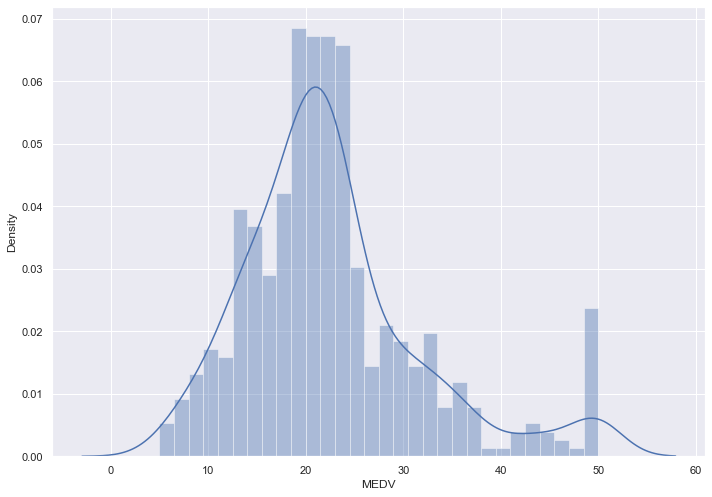

In [198]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [199]:
df['LSTAT'] = (df['LSTAT']-df['LSTAT'].mean())/df['LSTAT'].std()
df['RM'] = (df['RM']-df['RM'].mean())/df['RM'].std()
df['PTRATIO'] = (df['PTRATIO']-df['PTRATIO'].mean())/df['PTRATIO'].std()

In [200]:
x1 = df['LSTAT']
x2 = df['RM']
x3 = df['PTRATIO']
X = np.c_[x1,x2,x3]
y = df['MEDV']

In [201]:
X.shape

(506, 3)

In [202]:
y = np.array(y)

In [203]:
y = y.reshape(506,1)

In [204]:
X_train,X_test = X[:405],X[405:]


In [205]:
y_train,y_test = y[:405],y[405:]

In [206]:
X_train.shape

(405, 3)

In [207]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [208]:
def mse_loss(y_pred, y_true):
    squared_error = np.square(y_pred - y_true) 
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss


In [212]:
def SGD(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,4)
    w2 = np.random.randn(100,100)
    m = 405
    cost = 0
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            ypred = np.dot(w3.T,a2)
            cost += mse_loss(ypred,y_in)
            dz3 = (2)*(ypred - y_in).reshape(1,1)
            dw3 = (1/m)*(ypred-y_in)*a2
            dz2 = (1/m)*(ypred - y_in)*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3
        cost_history[i] = (1/405)*cost
        
    return w1,w2,w3,cost_history


In [221]:
X1 = np.c_[np.ones((405,1)),X_train]

a = 0.1
epoch = 500
w3 = np.random.randn(100,1)

w1,w2,w3,cost_history = SGD(X1,y,w3,a,epoch)


In [222]:
z1 = np.dot(w1,X1.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
ypred = np.dot(w3.T,a2)

In [223]:
ypred = ypred.reshape(405,1)

In [224]:
X_train.shape

(405, 3)

In [225]:
ypred.shape

(405, 1)

In [226]:

mse = (1/405)*np.sum(np.square(ypred-y_train))


mse

12.424412136970988

In [228]:
X_train.shape

(405, 3)

In [229]:
X_test1 = np.c_[np.ones((101,1)),X_test]

In [230]:
X_test1.shape

(101, 4)

In [231]:
y_test.shape

(101, 1)

In [232]:
z1 = np.dot(w1,X_test1.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
ypred_test = np.dot(w3.T,a2)

In [233]:
ypred_test = ypred_test.reshape(101,1)

In [234]:
mse = (1/101)*np.sum(np.square(ypred_test.reshape(101,1)-y_test))

In [235]:
mse

16.25353048413422

Text(0, 0.5, 'loss')

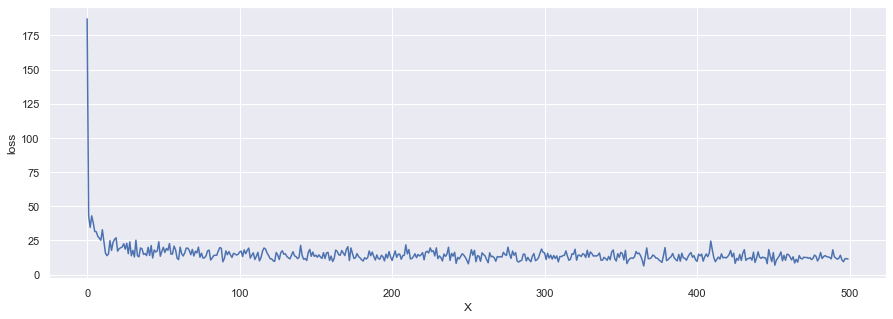

In [236]:
plt.figure(figsize=(15,5))
plt.plot(range(500),cost_history)
plt.xlabel('X')
plt.ylabel('loss')

In [ ]:
#Tensorflow

In [239]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [242]:
model = Sequential()
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(1))
model.compile(optimizer=SGD(learning_rate=0.1),loss ='mse',metrics='accuracy')

In [243]:
model.fit(x = X_train,y = y_train,epochs = 500)

Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 6655.7500 - accuracy: 0.0000e+00
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 86.7086 - accuracy: 0.0000e+00
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 85.9064 - accuracy: 0.0000e+00
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 81.4672 - accuracy: 0.0000e+00
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 82.5404 - accuracy: 0.0000e+00
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 67.7001 - accuracy: 0.0000e+00
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 56.8577 - accuracy: 0.0000e+00
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 51.9131 - accuracy: 0.0000e+00
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 42.1742 - accuracy: 0.0000e+00
Epoch 10/500
13/13 [==============================] - 0s 1ms/s

13/13 [==============================] - 0s 1ms/step - loss: 21.0281 - accuracy: 0.0000e+00
Epoch 80/500
13/13 [==============================] - 0s 2ms/step - loss: 18.5521 - accuracy: 0.0000e+00
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 18.0388 - accuracy: 0.0000e+00
Epoch 82/500
13/13 [==============================] - 0s 2ms/step - loss: 17.8227 - accuracy: 0.0000e+00
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 18.6592 - accuracy: 0.0000e+00
Epoch 84/500
13/13 [==============================] - 0s 2ms/step - loss: 19.4300 - accuracy: 0.0000e+00
Epoch 85/500
13/13 [==============================] - 0s 2ms/step - loss: 16.7945 - accuracy: 0.0000e+00
Epoch 86/500
13/13 [==============================] - 0s 2ms/step - loss: 17.7810 - accuracy: 0.0000e+00
Epoch 87/500
13/13 [==============================] - 0s 1ms/step - loss: 17.3162 - accuracy: 0.0000e+00
Epoch 88/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 1ms/step - loss: 15.0072 - accuracy: 0.0000e+00
Epoch 234/500
13/13 [==============================] - 0s 1ms/step - loss: 15.5318 - accuracy: 0.0000e+00
Epoch 235/500
13/13 [==============================] - 0s 1ms/step - loss: 15.2561 - accuracy: 0.0000e+00
Epoch 236/500
13/13 [==============================] - 0s 2ms/step - loss: 15.2151 - accuracy: 0.0000e+00
Epoch 237/500
13/13 [==============================] - 0s 2ms/step - loss: 15.4216 - accuracy: 0.0000e+00
Epoch 238/500
13/13 [==============================] - 0s 2ms/step - loss: 15.1550 - accuracy: 0.0000e+00
Epoch 239/500
13/13 [==============================] - 0s 1ms/step - loss: 15.3542 - accuracy: 0.0000e+00
Epoch 240/500
13/13 [==============================] - 0s 2ms/step - loss: 14.9338 - accuracy: 0.0000e+00
Epoch 241/500
13/13 [==============================] - 0s 2ms/step - loss: 15.2278 - accuracy: 0.0000e+00
Epoch 242/500
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 2ms/step - loss: 14.2226 - accuracy: 0.0000e+00
Epoch 388/500
13/13 [==============================] - 0s 1ms/step - loss: 14.3005 - accuracy: 0.0000e+00
Epoch 389/500
13/13 [==============================] - 0s 2ms/step - loss: 14.5120 - accuracy: 0.0000e+00
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 14.8256 - accuracy: 0.0000e+00
Epoch 391/500
13/13 [==============================] - 0s 2ms/step - loss: 15.8836 - accuracy: 0.0000e+00
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 14.4579 - accuracy: 0.0000e+00
Epoch 393/500
13/13 [==============================] - 0s 2ms/step - loss: 14.6919 - accuracy: 0.0000e+00
Epoch 394/500
13/13 [==============================] - 0s 2ms/step - loss: 14.4963 - accuracy: 0.0000e+00
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 14.5222 - accuracy: 0.0000e+00
Epoch 396/500
13/13 [==============================] - 0s 2m

In [272]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

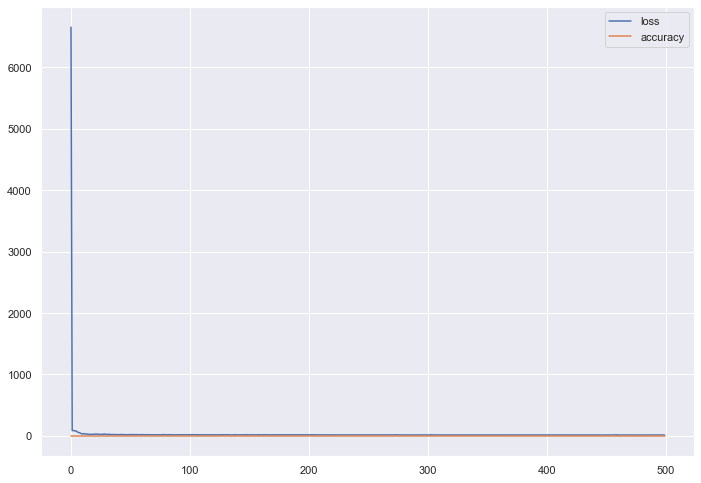

In [273]:
loss.plot()

In [37]:
# same question - Huber loss

In [255]:
def Huber_cost(yHat, y, delta=1):
    return np.where(np.abs(y-yHat) < delta,.5*(y-yHat)**2 , delta*(np.abs(y-yHat)-0.5*delta))

In [256]:
def Huber_grad(yHat, y, delta=1):
    return np.where(np.abs(y-yHat) < delta,(-1)*(y-yHat), delta*(-1))

In [257]:
X_train.shape

(405, 3)

In [258]:
def SGD_Huber(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,4)
    w2 = np.random.randn(100,100)
    m = 405
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            ypred = np.dot(w3.T,a2)
            cost+= Huber_cost(ypred,y_in)
            dz3 = Huber_grad(ypred,y_in).reshape(1,1)
            dw3 = (1/m)*(ypred-y_in)*a2
            dz2 = (1/m)*(ypred - y_in)*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3

        cost_history[i] = (1/405)*cost 
    return w1,w2,w3,cost_history


In [259]:
X_train.shape

(405, 3)

In [260]:
X2 = np.c_[np.ones((405,1)),X_train]

a = 1
epoch = 500
w3 = np.random.randn(100,1)

w1,w2,w3,cost_history1 = SGD_Huber(X2,y,w3,a,epoch)

In [261]:
z1 = np.dot(w1,X2.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
ypred_Huber = np.dot(w3.T,a2)

In [262]:
ypred_Huber = ypred_Huber.reshape(405,1)


Text(0, 0.5, 'loss')

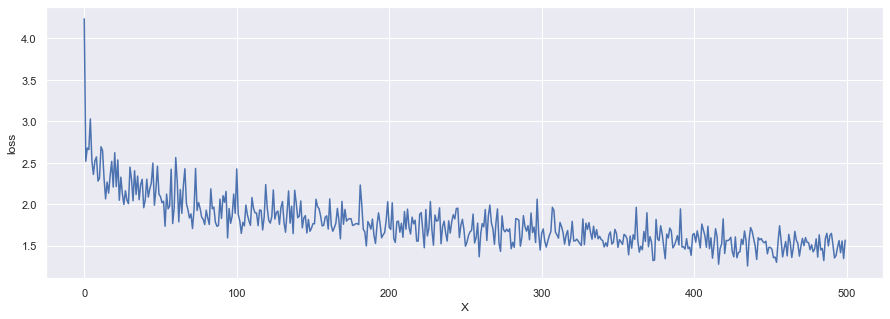

In [263]:
plt.figure(figsize=(15,5))
plt.plot(range(500),cost_history1)
plt.xlabel('X')
plt.ylabel('loss')


In [264]:
def SEHL(yHat,y, e = 0.2):
    
    return 0.5*np.maximum(0.0,(yHat-y)**2 - e**2)

In [265]:
def SEHL_grad(yHat,y,e=0.2):
    
    return np.maximum(0.0,np.abs(yHat,y))

In [266]:
def SGD_SEHL(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,4)
    w2 = np.random.randn(100,100)
    m = 405
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            ypred = np.dot(w3.T,a2)
            cost+= SEHL(ypred,y_in)
            dz3 = Huber_grad(ypred,y_in).reshape(1,1)
            dw3 = (1/m)*(ypred-y_in)*a2
            dz2 = (1/m)*(ypred - y_in)*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3

        cost_history[i] = (1/405)*cost 
    return w1,w2,w3,cost_history


In [267]:
y_train.shape

(405, 1)

In [268]:
X3 = np.c_[np.ones((405,1)),X_train]

a = 1
epoch = 500
w3 = np.random.randn(100,1)

w1,w2,w3,cost_history2 = SGD_Huber(X3,y,w3,a,epoch)

In [269]:
z1 = np.dot(w1,X3.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
ypred_SEHL = np.dot(w3.T,a2)
ypred_SEHL = ypred_SEHL.reshape(405,1)

Text(0, 0.5, 'loss')

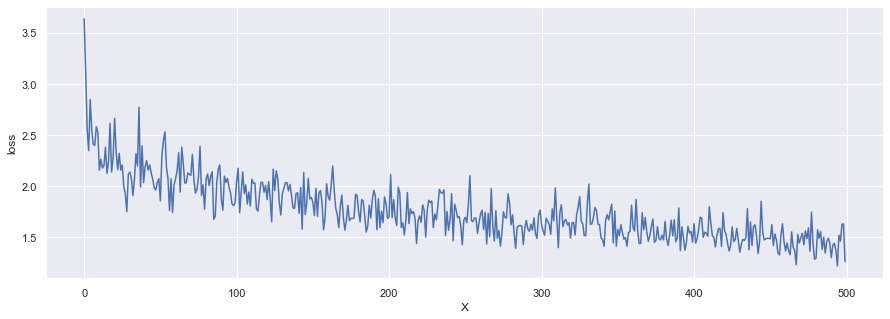

In [270]:
plt.figure(figsize=(15,5))
plt.plot(range(500),cost_history2)
plt.xlabel('X')
plt.ylabel('loss')


In [274]:
d = {'MSE': cost_history,'Huber':cost_history1,'SEHL':cost_history2}

In [275]:
df = pd.DataFrame(d)

In [276]:
df

,MSE,Huber,SEHL
0,187.090845,4.235892,3.634932
1,43.152154,2.518753,3.123392
2,34.475907,2.678407,2.554767
3,42.947510,2.659744,2.348677
4,37.909806,3.028785,2.847514
...,...,...,...
495,10.701773,1.562301,1.521087
496,9.357304,1.416868,1.464295
497,11.564987,1.557415,1.629767
498,11.665219,1.346464,1.631730


<AxesSubplot:>

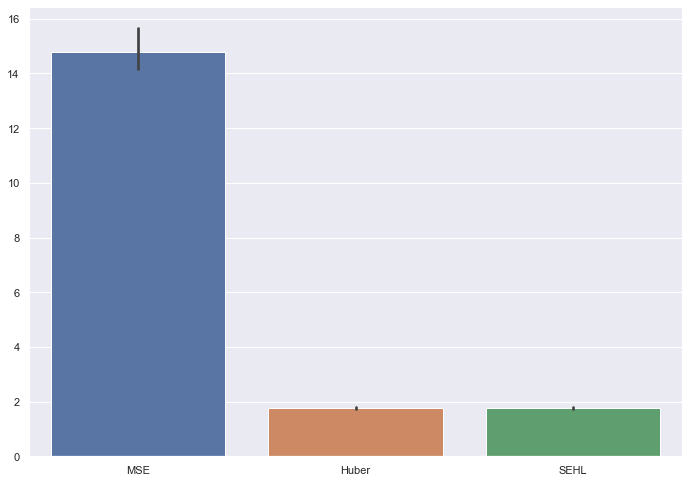

In [279]:
sns.barplot(data =df)

In [ ]:
#HUBER loss function performs better than the other loss functions

In [60]:
# question 2 -ANN model for brest cancer detection

In [402]:
from sklearn.datasets import load_breast_cancer

In [403]:
cancer = load_breast_cancer()

In [404]:
df = pd.DataFrame(cancer.data,columns =cancer.feature_names)

In [405]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [406]:
df.isnull().values.any()

False

In [407]:
df['cancer'] = cancer.target

In [408]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [409]:
X = df.drop('cancer',axis =1)

In [410]:
y = df['cancer']

In [411]:
X.iloc[:,0] - X.iloc[:,0].mean()

0      3.862708
1      6.442708
2      5.562708
3     -2.707292
4      6.162708
         ...   
564    7.432708
565    6.002708
566    2.472708
567    6.472708
568   -6.367292
Name: mean radius, Length: 569, dtype: float64

In [412]:
for i in range(30):
    X.iloc[:,i] = (X.iloc[:,i] - X.iloc[:,i].mean())/X.iloc[:,i].std()

In [413]:
X_train,X_test = X[:456],X[456:]
y_train,y_test = y[:456],y[456:]

In [414]:
X_test.shape

(113, 30)

In [415]:
def compute_loss_2(h, y):
        return (np.multiply(-y, np.log(h)) - np.multiply((1 - y), np.log(1 - h)))

In [416]:
def SGD_2(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,31)
    w2 = np.random.randn(100,100)
    m = 456
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            ypred = sigmoid(z3)
            cost+= compute_loss_2(ypred, y_in)
            dz3 = (ypred - y_in).reshape(1,1)
            dw3 = (ypred-y_in)*a2
            dz2 = (ypred - y_in)*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3
        cost_history[i] = (1/456)*cost
      
    return w1,w2,w3,cost_history


In [417]:
X_test.shape

(113, 30)

In [418]:
X_train = np.c_[np.ones((456,1)),X_train]
X_test = np.c_[np.ones((113,1)),X_test]


In [419]:
X_test.shape

(113, 31)

In [420]:
y_train = np.array(y_train)

In [421]:
y_train = y_train.reshape(456,1)

In [422]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,1)

w1,w2,w3,cost_history2 = SGD_2(X_train,y_train,w3,a,epoch)


In [423]:
z1 = np.dot(w1,X_train.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
ypred = sigmoid(z3)

In [424]:
y_train.shape

(456, 1)

In [425]:
ypred = ypred.reshape(456,1)

In [426]:
ypred

array([[2.02991990e-04],
       [8.22133266e-05],
       [9.35245817e-06],
       [1.02612880e-02],
       [5.76979631e-05],
       [1.48438032e-03],
       [1.13694281e-06],
       [2.58493112e-04],
       [3.13662747e-07],
       [1.76878228e-04],
       [4.45627561e-04],
       [4.03988180e-04],
       [6.93881099e-04],
       [7.27288793e-03],
       [2.59438050e-04],
       [3.97465137e-07],
       [4.24482276e-06],
       [7.84332679e-07],
       [1.61709815e-06],
       [9.98447724e-01],
       [9.99730708e-01],
       [9.99999597e-01],
       [1.56649656e-03],
       [4.23218117e-06],
       [1.12339494e-06],
       [3.61025624e-04],
       [7.76280169e-06],
       [3.56788172e-06],
       [7.20509127e-08],
       [2.08188651e-03],
       [9.29788686e-07],
       [7.92216058e-04],
       [3.41093192e-06],
       [2.89995374e-05],
       [7.00180626e-04],
       [1.38000814e-04],
       [3.85690314e-05],
       [9.99916204e-01],
       [6.40434221e-03],
       [5.14692909e-04],


In [427]:
for i in range(456):
    
    if ypred[i] < 0.5:
        ypred[i] = 0
    else:
        ypred[i] = 1

In [428]:
ypred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [429]:
from sklearn.metrics import classification_report

In [430]:
target_names = ['class 0', 'class 1']


In [431]:
print(classification_report(y_train, ypred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       186
     class 1       1.00      1.00      1.00       270

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



In [432]:
z1 = np.dot(w1,X_test.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
y_pred_test = sigmoid(z3)

In [433]:
y_pred_test = y_pred_test.reshape(113,1)

In [434]:
for i in range(113):
    
    if y_pred_test[i] < 0.5:
        y_pred_test[i] = 0
    else:
        y_pred_test[i] = 1

In [435]:
y_test = np.array(y_test)

In [436]:
y_test = y_test.reshape(113,1)

In [437]:
target_names = ['class 0', 'class 1']

In [438]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      1.00      0.91        26
     class 1       1.00      0.94      0.97        87

    accuracy                           0.96       113
   macro avg       0.92      0.97      0.94       113
weighted avg       0.96      0.96      0.96       113



Text(0, 0.5, 'loss')

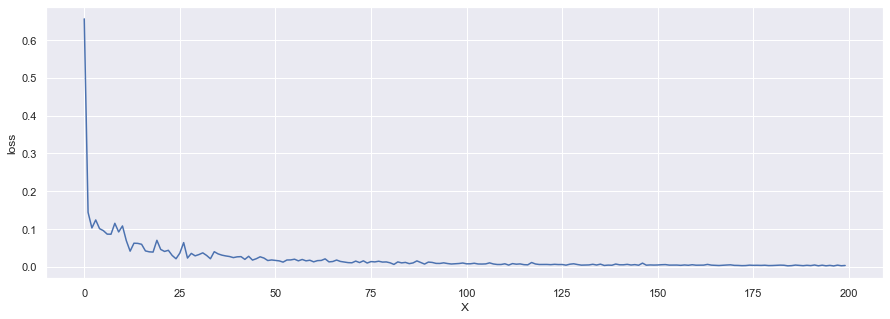

In [439]:
plt.figure(figsize=(15,5))
plt.plot(range(200),cost_history2)
plt.xlabel('X')
plt.ylabel('loss')

In [440]:
from sklearn.metrics import confusion_matrix

In [441]:
print(confusion_matrix(y_test,y_pred_test))

[[26  0]
 [ 5 82]]


In [442]:
# PART 2 - DICE LOSS

In [443]:
#Dice Loss
def dice(y, y_pred):
  intersection = (y * y_pred)
  total = (y + y_pred)
  dice = (2.0 * intersection) / total
  return 1 - dice

def g_dice(y, y_pred):
    return -(y/(y + y_pred))**2;


In [444]:
X_train,X_test = X[:456],X[456:]
y_train,y_test = y[:456],y[456:]

In [445]:
X_test.shape

(113, 30)

In [446]:
def SGD_2_dice(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,31)
    w2 = np.random.randn(100,100)
    m = 456
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            ypred = sigmoid(z3)
            cost+= dice(y_in, ypred)
            dz3 = g_dice(y_in,ypred).reshape(1,1)
            dw3 = dz3*a2
            dz2 = dz3*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3
        cost_history[i] = cost
      
    return w1,w2,w3,cost_history


In [447]:
X_train = np.c_[np.ones((456,1)),X_train]
X_test = np.c_[np.ones((113,1)),X_test]

In [448]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,1)

w1,w2,w3,cost_history2 = SGD_2_dice(X_train,y_train,w3,a,epoch)

In [449]:
z1 = np.dot(w1,X_test.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
y_pred_test_dice = sigmoid(z3)

In [474]:
from sklearn.metrics import confusion_matrix,classification_report

In [451]:
target_names = ['class 0', 'class 1']

In [481]:
y_pred_test_dice.shape

(113, 1)

In [453]:
print(classification_report(y_test, y_pred_test_dice.reshape(113,1), target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        26
     class 1       0.77      1.00      0.87        87

    accuracy                           0.77       113
   macro avg       0.38      0.50      0.43       113
weighted avg       0.59      0.77      0.67       113



/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [454]:
y_pred_test_dice = y_pred_test_dice.reshape(113,1)

In [455]:
y_test.shape

(113,)

In [456]:
print(confusion_matrix(y_pred_test_dice,y_test))

[[ 0  0]
 [26 87]]


In [457]:
# same question - Adam descent

In [507]:
X_train,X_test = X[:456],X[456:]
y_train,y_test = y[:456],y[456:]

In [509]:
X_test.shape


(113, 30)

In [510]:
def SGD_2(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,31)
    Vdw1 = np.zeros((100,31))
    Sdw1 = np.zeros((100,31))
    w2 = np.random.randn(100,100)
    Vdw2 = np.zeros((100,100))
    Sdw2 = np.zeros((100,100))
    Vdw3 = np.zeros((100,1))
    Sdw3 = np.zeros((100,1))
    m = 456
    e = 10**(-8)
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            ypred = sigmoid(z3)
            cost+= compute_loss_2(ypred, y_in)
            dz3 = (ypred - y_in).reshape(1,1)
            dw3 = (ypred-y_in)*a2
            dz2 = (ypred - y_in)*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            Vdw1 = 0.9*Vdw1 +(0.1)*dw1
            Sdw1 = 0.999*Sdw1 + (0.001)*np.multiply(dw1,dw1)
            Vdw2 = 0.9*Vdw2 +(0.1)*dw2
            Sdw2 = 0.999*Sdw2 + (0.001)*np.multiply(dw2,dw2)
            Vdw3 = 0.9*Vdw3 +(0.1)*dw3
            Sdw3 = 0.999*Sdw3 + (0.001)*np.multiply(dw3,dw3)

            w1 = w1 - a*Vdw1/(np.sqrt(Sdw1 + e))
            w2 = w2 - a*Vdw2/(np.sqrt(Sdw2 + e))
            w3 = w3 - a*Vdw3/(np.sqrt(Sdw3 + e))
        cost_history[i] = (1/456)*cost
      
    return w1,w2,w3,cost_history


In [511]:
X_train_ = np.c_[np.ones((456,1)),X_train]
X_test_ = np.c_[np.ones((113,1)),X_test]


In [512]:
y_train = np.array(y_train)
y_train = y_train.reshape(456,1)

In [513]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,1)

w1,w2,w3,cost_history2 = SGD_2(X_train_,y_train,w3,a,epoch)

In [514]:
z1 = np.dot(w1,X_test_.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
ypred = sigmoid(z3)

In [515]:
ypred = ypred.reshape(113,1)

In [516]:
y_test.shape

(113,)

In [517]:
for i in range(113):
    
    if ypred[i] < 0.5:
        ypred[i] = 0
    else:
        ypred[i] = 1

In [518]:
target_names = ['class 0', 'class 1']

In [519]:
print(classification_report(y_test, ypred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.90      1.00      0.95        26
     class 1       1.00      0.97      0.98        87

    accuracy                           0.97       113
   macro avg       0.95      0.98      0.96       113
weighted avg       0.98      0.97      0.97       113



In [500]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [520]:
model = Sequential()
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'SGD',loss = 'bce' )

In [521]:
model.fit(x = X_train,y = y_train,epochs = 200)

Epoch 1/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6745
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6673
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6638
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6592
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6555
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6514
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6473
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6430
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6387
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6351
Epoch 11/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6307
Epoch 12/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6259
Epoch 13/200
15/15 [=================

In [522]:
prediction = model.predict(X_test)

In [523]:
print(classification_report(y_test, ypred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.90      1.00      0.95        26
     class 1       1.00      0.97      0.98        87

    accuracy                           0.97       113
   macro avg       0.95      0.98      0.96       113
weighted avg       0.98      0.97      0.97       113



In [390]:
# 3rd question - diabetes-from pima-indians-diabetes-database 

In [530]:
df = pd.read_csv("https://raw.githubusercontent.com/duonghuuphuc/keras/master/dataset/pima-indians-diabetes.csv")

In [531]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [532]:
X = df.drop('1',axis =1)

In [533]:
y = df['1']

In [534]:
for i in range(8):
    
    X.iloc[:,i] = (X.iloc[:,i] - X.iloc[:,i].mean())/X.iloc[:,i].std()

In [535]:
X

,6,148,72,35,0,33.6,0.627,50
0,-0.843176,-1.121354,-0.160144,0.531677,-0.693107,-0.683283,-0.364027,-0.188817
1,1.233435,1.943208,-0.263406,-1.286043,-0.693107,-1.101582,0.604306,-0.103727
2,-0.843176,-0.996270,-0.160144,0.155597,0.122277,-0.493147,-0.919084,-1.039715
3,-1.139835,0.504740,-1.502554,0.907756,0.764175,1.408213,5.479157,-0.018638
4,0.343459,-0.151952,0.252905,-1.286043,-0.693107,-0.810040,-0.816519,-0.273907
...,...,...,...,...,...,...,...,...
762,1.826753,-0.621018,0.356167,1.722596,0.868267,0.115288,-0.907018,2.534055
763,-0.546517,0.035674,0.046381,0.406317,-0.693107,0.609642,-0.397210,-0.529176
764,0.343459,0.004403,0.149643,0.155597,0.278414,-0.733986,-0.683788,-0.273907
765,-0.843176,0.160758,-0.469931,-1.286043,-0.693107,-0.239632,-0.370060,1.172619


In [123]:
X_train,X_test = X[:614],X[614:]
y_train,y_test = y[:614],y[614:]

In [124]:
X_test.shape

(153, 8)

In [125]:
X_train = np.c_[np.ones((614,1)),X_train]
X_test = np.c_[np.ones((153,1)),X_test]


In [126]:
X_train.shape

(614, 9)

In [127]:
y_train = np.array(y_train).reshape(614,1)

In [128]:
y_test = np.array(y_test).reshape(153,1)

In [129]:
def SGD_3(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,9)
    w2 = np.random.randn(100,100)
    m = 614
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            ypred = sigmoid(z3)
           
            dz3 = (ypred - y_in).reshape(1,1)
            dw3 = (ypred-y_in)*a2
            dz2 = (ypred - y_in)*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3

      
    return w1,w2,w3


In [130]:
X_train.shape

(614, 9)

In [131]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,1)

w1,w2,w3 = SGD_3(X_train,y_train,w3,a,epoch)


In [132]:
z1 = np.dot(w1,X_train.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
ypred3 = sigmoid(z3)

In [133]:
ypred3 = np.array(ypred3).reshape(614,1)

In [134]:
ypred3.shape

(614, 1)

In [135]:
ypred3

array([[1.32512686e-02],
       [9.93669798e-01],
       [4.39097518e-03],
       [9.67505517e-01],
       [3.17036601e-02],
       [6.64843344e-01],
       [1.89927561e-01],
       [9.99464694e-01],
       [7.71966311e-01],
       [1.42077468e-02],
       [8.96806610e-01],
       [9.36879504e-02],
       [9.66978116e-01],
       [9.31717842e-01],
       [6.37854570e-01],
       [8.47860812e-01],
       [9.74697029e-01],
       [7.28816353e-02],
       [9.59354977e-01],
       [4.68651116e-01],
       [3.51079327e-03],
       [9.82608163e-01],
       [8.95248409e-01],
       [8.61563560e-01],
       [6.10323284e-01],
       [9.77753955e-01],
       [1.92513181e-06],
       [9.76495237e-04],
       [3.91181279e-02],
       [2.06994241e-03],
       [9.98823509e-01],
       [1.92263138e-04],
       [1.23735677e-03],
       [1.79727765e-01],
       [2.65951904e-03],
       [2.82243148e-01],
       [9.04979095e-01],
       [2.34660213e-01],
       [8.92280655e-01],
       [6.89666187e-01],


In [136]:
for i in range(614):
    
    if ypred3[i] < 0.5 :
        ypred3[i] = 0
    else:
        ypred3[i]=1
    

In [137]:
target_names = ['class 0', 'class 1']

In [138]:
print(classification_report(y_train, ypred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98       401
     class 1       0.97      0.97      0.97       213

    accuracy                           0.98       614
   macro avg       0.98      0.98      0.98       614
weighted avg       0.98      0.98      0.98       614



In [139]:
z1 = np.dot(w1,X_test.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
ypred_test3 = sigmoid(z3)

In [140]:
ypred_test3 = np.array(ypred_test3).reshape(153,1)

In [141]:
for i in range(153):
    
    if ypred_test3[i] < 0.5 :
        ypred_test3[i] = 0
    else:
        ypred_test3[i]=1
    

In [142]:
print(classification_report(y_test, ypred_test3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.83      0.79        99
     class 1       0.62      0.52      0.57        54

    accuracy                           0.72       153
   macro avg       0.69      0.67      0.68       153
weighted avg       0.71      0.72      0.71       153



In [524]:
#part2 dice loss


In [536]:
#Dice Loss
def dice(y, y_pred):
  intersection = (y * y_pred)
  total = (y + y_pred)
  dice = (2.0 * intersection) / total
  return 1 - dice

def g_dice(y, y_pred):
    return -(y/(y + y_pred))**2;

In [537]:
X_train,X_test = X[:614],X[614:]
y_train,y_test = y[:614],y[614:]

In [539]:
X_test.shape

(153, 8)

In [543]:
def SGD_3_dice(X,y,w3,a,epoch):
    
    cost_history = np.zeros(epoch)
    w1 = np.random.randn(100,9)
    w2 = np.random.randn(100,100)
    m = 456
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            ypred = sigmoid(z3)
            cost+= dice(y_in, ypred)
            dz3 = g_dice(y_in,ypred).reshape(1,1)
            dw3 = dz3*a2
            dz2 = dz3*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3
        cost_history[i] = cost
      
    return w1,w2,w3,cost_history


In [541]:
X_train = np.c_[np.ones((614,1)),X_train]
X_test = np.c_[np.ones((153,1)),X_test]

In [544]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,1)

w1,w2,w3,cost_history2 = SGD_3_dice(X_train,y_train,w3,a,epoch)

In [546]:
z1 = np.dot(w1,X_test.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
ypred = sigmoid(z3)

In [547]:
ypred.shape

(1, 153)

In [548]:
target_names = ['class 0', 'class 1']

In [549]:
print(classification_report(y_test, ypred.reshape(153,1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        99
     class 1       0.35      1.00      0.52        54

    accuracy                           0.35       153
   macro avg       0.18      0.50      0.26       153
weighted avg       0.12      0.35      0.18       153



/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [ ]:
#ADAM - SAME QUESTION

In [552]:
X = df.drop('1',axis =1)

In [553]:
y = df['1']

In [556]:
X_train,X_test = X[:614],X[614:]
y_train,y_test = y[:614],y[614:]

In [558]:
X_test.shape

(153, 8)

In [583]:
def sigmoid(z):
    
    a = np.float128(np.exp(-z))
    return 1.0/(1.0+a)

In [584]:
def SGD_3_ADAM(X,y,w3,a,epoch):
    
    
    w1 = np.random.randn(100,9)
    Vdw1 = np.zeros((100,9))
    Sdw1 = np.zeros((100,9))
    w2 = np.random.randn(100,100)
    Vdw2 = np.zeros((100,100))
    Sdw2 = np.zeros((100,100))
    Vdw3 = np.zeros((100,1))
    Sdw3 = np.zeros((100,1))
    m = 456
    e = 10**(-8)
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,X.shape[1])
            y_in = y[index].reshape(1,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            ypred = sigmoid(z3)
          
            dz3 = (ypred - y_in).reshape(1,1)
            dw3 = (ypred-y_in)*a2
            dz2 = (ypred - y_in)*np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1)))
            dw2 = np.dot(dz2,a1.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            Vdw1 = 0.9*Vdw1 +(0.1)*dw1
            Sdw1 = 0.999*Sdw1 + (0.001)*np.multiply(dw1,dw1)
            Vdw2 = 0.9*Vdw2 +(0.1)*dw2
            Sdw2 = 0.999*Sdw2 + (0.001)*np.multiply(dw2,dw2)
            Vdw3 = 0.9*Vdw3 +(0.1)*dw3
            Sdw3 = 0.999*Sdw3 + (0.001)*np.multiply(dw3,dw3)

            w1 = w1 - a*Vdw1/(np.sqrt(Sdw1 + e))
            w2 = w2 - a*Vdw2/(np.sqrt(Sdw2 + e))
            w3 = w3 - a*Vdw3/(np.sqrt(Sdw3 + e))
 
      
    return w1,w2,w3


In [559]:
X_train_ = np.c_[np.ones((614,1)),X_train]
X_test_ = np.c_[np.ones((153,1)),X_test]


In [561]:
y_train = np.array(y_train)
y_train = y_train.reshape(614,1)

In [593]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,1)

w1,w2,w3 = SGD_3_ADAM(X_train_,y_train,w3,a,epoch)

In [594]:
w3.shape

(100, 1)

In [595]:
z1 = np.dot(w1,X_test_.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
ypred3 = sigmoid(z3)

In [596]:
ypred3 = np.array(ypred3).reshape(153,1)

In [597]:
ypred3.shape

(153, 1)

In [598]:
for i in range(153):
    
    if ypred3[i] < 0.5 :
        ypred3[i] = 0
    else:
        ypred3[i]=1
    

In [599]:
print(classification_report(y_test,ypred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        99
     class 1       0.00      0.00      0.00        54

    accuracy                           0.65       153
   macro avg       0.32      0.50      0.39       153
weighted avg       0.42      0.65      0.51       153



/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinsantosh/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [601]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [603]:
model = Sequential()
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(1,activation ='sigmoid'))
model.compile(optimizer = 'ADAM',loss ='bce')

In [604]:
model.fit(x = X_train,y = y_train,epochs = 500)

Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6410
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6221
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6051
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5964
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5831
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5785
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5689
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5620
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5593
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5527
Epoch 11/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5471
Epoch 12/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5479
Epoch 13/500
20/20 [=================

20/20 [==============================] - 0s 1ms/step - loss: 0.3345
Epoch 203/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3279
Epoch 204/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3380
Epoch 205/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3321
Epoch 206/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3419
Epoch 207/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3276
Epoch 208/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3284
Epoch 209/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3298
Epoch 210/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3406
Epoch 211/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3404
Epoch 212/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3413
Epoch 213/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3304
Epoch 214/500
20/20 [=========

20/20 [==============================] - 0s 1ms/step - loss: 0.2692
Epoch 303/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2598
Epoch 304/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2609
Epoch 305/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2623
Epoch 306/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2833
Epoch 307/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2518
Epoch 308/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2592
Epoch 309/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2573
Epoch 310/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2497
Epoch 311/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2516
Epoch 312/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2588
Epoch 313/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2538
Epoch 314/500
20/20 [=========

20/20 [==============================] - 0s 1ms/step - loss: 0.2282
Epoch 403/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2133
Epoch 404/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2121
Epoch 405/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2160
Epoch 406/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2107
Epoch 407/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2018
Epoch 408/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1983
Epoch 409/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2093
Epoch 410/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2354
Epoch 411/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2076
Epoch 412/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 413/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2106
Epoch 414/500
20/20 [=========

In [605]:
pred = model.predict(X_test)

In [607]:
for i in range(153):
    
    if pred[i] < 0.5 :
        pred[i] = 0
    else:
        pred[i]=1
    

In [608]:
print(classification_report(y_test,pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.85      0.79        99
     class 1       0.62      0.44      0.52        54

    accuracy                           0.71       153
   macro avg       0.68      0.65      0.65       153
weighted avg       0.69      0.71      0.69       153



In [143]:
#4th quedtion

In [8]:
from sklearn import datasets

In [9]:
iris = datasets.load_iris()

In [10]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [11]:
df['iris'] = iris.target

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
X = df.drop('iris',axis =1)

In [14]:
y = df['iris']

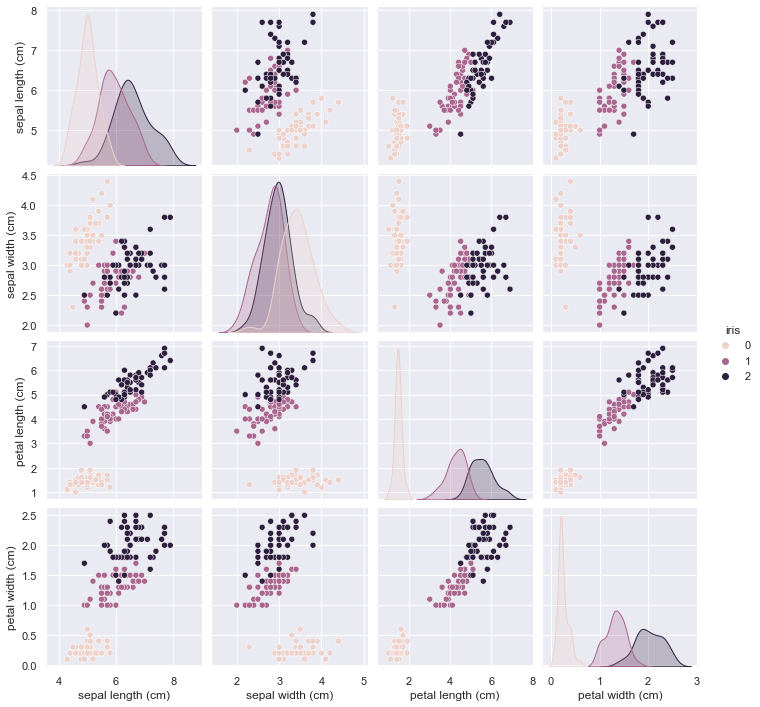

In [621]:
sns.pairplot(data=df,hue='iris')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

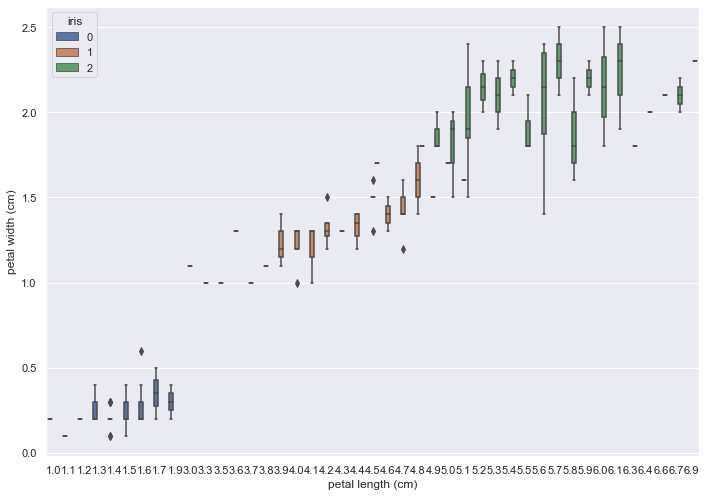

In [623]:
sns.boxplot(data=df,x='petal length (cm)',y='petal width (cm)',hue ='iris')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

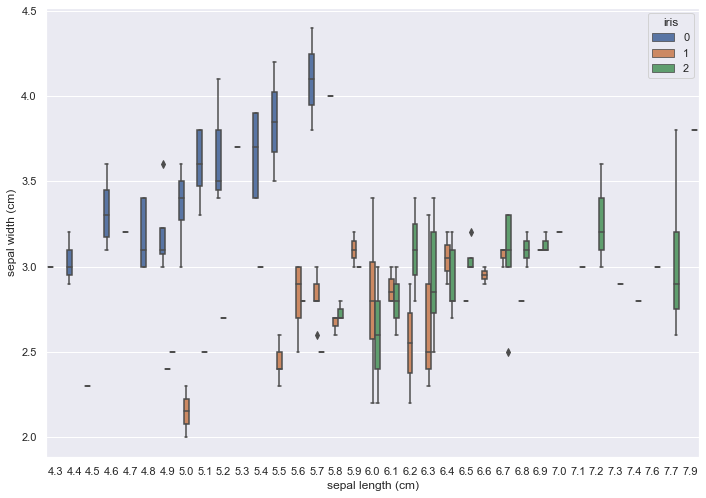

In [624]:
sns.boxplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue ='iris')

In [625]:
for i in range(4):
    
    X.iloc[:,i] = (X.iloc[:,i]-X.iloc[:,i].mean())/X.iloc[:,i].std()

In [626]:
from sklearn.utils import shuffle

In [627]:
X,y = shuffle(X,y)

In [628]:
def Softmax(z):
  
    e = np.exp(z - np.max(z))
    
    return e/np.sum(e,axis=0)

In [629]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [630]:
def SGD_4(X,y,w3,a,epoch):
    
    w1 = np.random.randn(100,5)
    w2 = np.random.randn(100,100)
    m = 120
   
    for i in range(epoch):

        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,5)
            y_in = y[index].reshape(3,1)
         
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            A =  Softmax(z3)
           
            dz3 = (A - y_in)
            dw3 = np.dot(a2,dz3.T)
            dz2 = np.dot(np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1))),dz3)
            dw2 = np.dot(a1,dz2.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            w1 = w1 - a*dw1
            w2 = w2 - a*dw2
            w3 = w3 - a*dw3

      
    return w1,w2,w3


In [631]:
X4_train,X4_test = X[:135],X[135:]
y4_train,y4_test = y[:135],y[135:]

In [632]:

y4_train = np.array(y4_train)
y4_test = np.array(y4_test)

In [633]:
X = np.c_[np.ones((135,1)),X4_train]

In [634]:
X4_train = np.matrix(X)
X4_train.shape

(135, 5)

In [635]:
y4_train_hot = np.eye(3)[y4_train]
y4_train_hot

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

In [636]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,3)

w1,w2,w3 = SGD_4(X4_train,y4_train_hot,w3,a,epoch)


In [637]:
def predict(X, w):
    return np.argmax(Softmax(X.T.dot(w)), axis=1)

In [638]:
z1 = np.dot(w1,X4_train.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)

In [639]:
y_pred = predict(a2,w3)

In [640]:
y_pred.shape

(135, 1)

In [641]:
from sklearn.metrics import classification_report

In [642]:
target_names = ['class 2', 'class 1','class 0']


In [643]:
print(classification_report(y_pred, y4_train, target_names=target_names))

              precision    recall  f1-score   support

     class 2       0.98      1.00      0.99        43
     class 1       0.98      0.90      0.94        52
     class 0       0.91      0.97      0.94        40

    accuracy                           0.96       135
   macro avg       0.95      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



In [644]:
X1 = np.c_[np.ones((15,1)),X4_test]

In [645]:
X4_test = np.matrix(X1)
X4_test.shape

(15, 5)

In [646]:
z1 = np.dot(w1,X4_test.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)


In [647]:
y_pred_test = predict(a2,w3)

In [648]:
print(classification_report(y_pred_test, y4_test, target_names=target_names))

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         6
     class 1       1.00      0.50      0.67         4
     class 0       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.83      0.83        15
weighted avg       0.90      0.87      0.86        15



In [871]:
#same question - ADAM

In [15]:
X = df.drop('iris',axis =1)

In [16]:
y = df['iris']

In [17]:
for i in range(4):
    
    X.iloc[:,i] = (X.iloc[:,i]-X.iloc[:,i].mean())/X.iloc[:,i].std()

In [18]:
from sklearn.utils import shuffle

In [19]:
X,y = shuffle(X,y)

In [20]:
X4_train,X4_test = X[:135],X[135:]
y4_train,y4_test = y[:135],y[135:]

In [21]:
X4_train.shape

(135, 4)

In [22]:
def Softmax(z):
  
    e = np.exp(z - np.max(z))
    
    return e/np.sum(e,axis=0)

In [23]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [87]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1) * L_sum

    return L

In [88]:
def SGD_4_ADAM(X,y,w3,a,epoch):
    
    
    w1 = np.random.randn(100,5)
    Vdw1 = np.zeros((100,5))
    Sdw1 = np.zeros((100,5))
    w2 = np.random.randn(100,100)
    Vdw2 = np.zeros((100,100))
    Sdw2 = np.zeros((100,100))
    Vdw3 = np.zeros((100,3))
    Sdw3 = np.zeros((100,3))
    m = 135
    e = 10**(-8)
    cost_history = np.zeros(epoch)
    for i in range(epoch):
        cost = .0
        for j in range(m):
            
            index = np.random.randint(m)
            x_in = X[index].reshape(1,5)
            y_in = y[index].reshape(3,1)
            
            z1 = np.dot(w1,x_in.T)
            a1 = sigmoid(z1)
            z2 = np.dot(w2,a1)
            a2 = sigmoid(z2)
            z3 = np.dot(w3.T,a2)
            A = Softmax(z3)
            cost = compute_multiclass_loss(y_in,A)
            dz3 = (A - y_in)
            dw3 = np.dot(a2,dz3.T)
            dz2 = np.dot(np.multiply(w3,np.multiply(a2.reshape(100,1),(1-a2).reshape(100,1))),dz3)
            dw2 = np.dot(a1,dz2.T)
            dz1 = np.multiply(np.dot(w2,dz2), np.multiply(a1.reshape(100,1),(1-a1).reshape(100,1)))
            dw1 = np.dot(dz1,x_in)
            
            Vdw1 = 0.9*Vdw1 +(0.1)*dw1
            Sdw1 = 0.999*Sdw1 + (0.001)*np.multiply(dw1,dw1)
            Vdw2 = 0.9*Vdw2 +(0.1)*dw2
            Sdw2 = 0.999*Sdw2 + (0.001)*np.multiply(dw2,dw2)
            Vdw3 = 0.9*Vdw3 +(0.1)*dw3
            Sdw3 = 0.999*Sdw3 + (0.001)*np.multiply(dw3,dw3)

            w1 = w1 - a*Vdw1/(np.sqrt(Sdw1 + e))
            w2 = w2 - a*Vdw2/(np.sqrt(Sdw2 + e))
            w3 = w3 - a*Vdw3/(np.sqrt(Sdw3 + e))
        cost_history[i] =(1/m)* cost 
      
    return w1,w2,w3,cost_history


In [25]:
X = np.c_[np.ones((135,1)),X4_train]
X1 = np.c_[np.ones((15,1)),X4_test]

In [26]:
X4_train_ = np.matrix(X)
X_test = np.matrix(X1)

In [27]:
y4_train_hot = np.eye(3)[y4_train]


In [98]:
a = 0.01
epoch = 200
w3 = np.random.randn(100,3)

w1,w2,w3,cost_history_adam = SGD_4_ADAM(X4_train_,y4_train_hot,w3,a,epoch)


In [99]:
z1 = np.dot(w1,X_test.T)
a1 = sigmoid(z1)
z2 = np.dot(w2,a1)
a2 = sigmoid(z2)
z3 = np.dot(w3.T,a2)
A = Softmax(z3)

In [100]:
z3.shape

(3, 15)

In [101]:
def predict(X, w):
    return np.argmax(Softmax(X.T.dot(w)), axis=1)

In [102]:
y_pred = predict(a2,w3)

In [103]:
y_pred.shape

(15, 1)

In [104]:
from sklearn.metrics import classification_report

In [105]:
target_names = ['class 2', 'class 1','class 0']


In [106]:
print(classification_report(y_pred, y4_test, target_names=target_names))

              precision    recall  f1-score   support

     class 2       0.80      1.00      0.89         4
     class 1       1.00      0.71      0.83         7
     class 0       0.80      1.00      0.89         4

    accuracy                           0.87        15
   macro avg       0.87      0.90      0.87        15
weighted avg       0.89      0.87      0.86        15



Text(0, 0.5, 'loss')

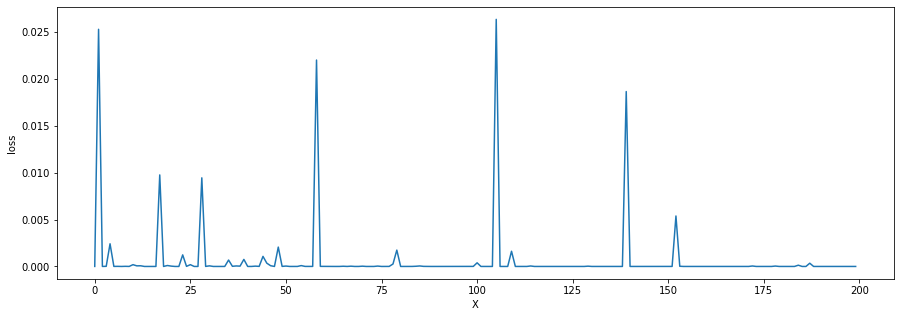

In [107]:
plt.figure(figsize=(15,5))
plt.plot(range(200),cost_history_adam)
plt.xlabel('X')
plt.ylabel('loss')

In [861]:
#Tensorflow

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [78]:
model = Sequential()
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(100,activation = 'sigmoid'))
model.add(Dense(3,activation = 'Softmax'))
model.compile(optimizer = 'ADAM',loss ='bce')

In [79]:
X4_train.shape

(135, 4)

In [80]:
model.fit(x = X4_train,y = y4_train,epochs = 200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1451
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1124
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1077
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1014
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1027
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0992
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1000
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0988
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0992
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0987
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0988
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 105/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 106/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 107/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 108/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 109/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 110/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 114/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 115/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 116/200
5/5 [==============================] - 0

In [85]:
prediction = model.predict(X4_test)